In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [7]:
#Leemos los datos
data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# **Análisis exploratorio de los datos**

1. Cargamos los datos.
2. Hacemos una revisión inicial.
3. Generamos un resúmen estadístico.
4. Generamos una visualización inicial.
5. Manejo de los valores faltantes.
6. Análisis de distribución.
7. Identificación de valores atípicos.
8. Análisis de relaciones.
9. Segmentación y agrupación.
10. Iteración y descubrimiento.
11. Documentación y comunicación.


# **Descripción del conjunto**

In [3]:
#Vemos la cantidad de datos
data.shape

(271116, 15)

# Objetivos

1. Conocer cuántas medallas se han dado en cada categoría.
2. Conocer qué deportes son los más populares.
3. Conocer cuántos hombres y mujeres han participado en los Juegos Olímpicos.

In [4]:
#Conocemos el conjunto de datos de forma general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Manejo de datos faltantes

In [13]:
#Rellenamos las columnas numéricas que tienen datos faltantes
numeric_columns = data.select_dtypes(include = ['number']) #seleccionamos las columnas que tienen valores numéricos
for column in numeric_columns.columns:
    data[column] = data[column].fillna(data[column].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [15]:
#Rellenamos las columnas que tienen valores tipo texto
data['Medal']= data['Medal'].fillna('Sin medalla')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Análisis del conjunto

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

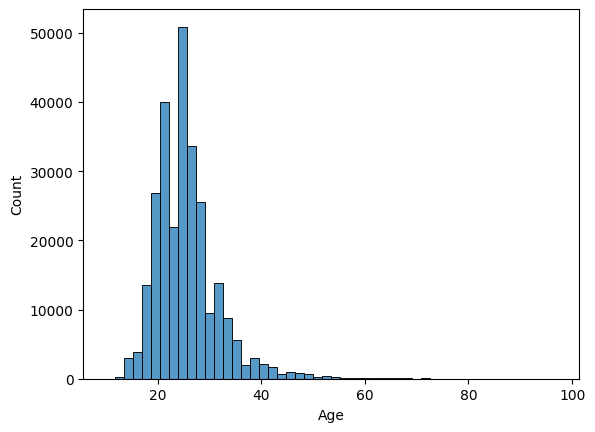

In [18]:
#Vemos gráficamente los datos según la edad
#Con este gráfico podemos ver que hay atletas que superan los 70 años
sns.histplot(data=data, x="Age", bins=50)

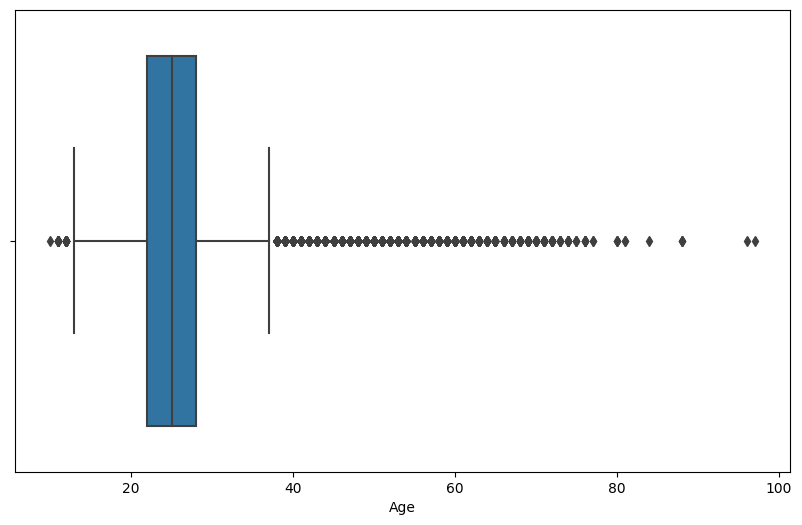

In [19]:
#Otro gráfico para ver la distribución de la edad
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Age'])
plt.show()

In [21]:
#Calculamos el rango intercuartílico
from scipy import stats
stats.iqr(data['Age'])

6.0

In [22]:
#Ese rango nos sirve para ver las edades que están al final de la linea
28 + (1.5*6) 

37.0

In [23]:
22 - (1.5*6)

13.0

In [26]:
#me traigo los atletas que tienen más de 37 años
atletas_mayores = data[data["Age"]>37] 
atletas_mayores.shape

(11928, 15)

In [27]:
#me traigo los atletas que tienen menos de 13 años
atletas_menores = data[data["Age"] < 13] 
atletas_menores.shape

(53, 15)

In [29]:
#Qué tipo de deportes práctican más los atletas mayores
atletas_mayores["Sport"].value_counts().head()

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

In [30]:
#Qué tipo de deportes práctican más los atletas menores
atletas_menores["Sport"].value_counts().head()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Name: count, dtype: int64

# Información en las distintas categorías

In [31]:
#Nos traemos las columnas que tienen información textual
text_columns = data.select_dtypes(include=['object'])
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [33]:
#Conocemos cuántos atletas hay por cada columna
for column in text_columns.columns:
    if column != 'Name':
        print(data[column].value_counts().head())

Sex
M    196594
F     74522
Name: count, dtype: int64
Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64
NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64
Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64
Season
Summer    222552
Winter     48564
Name: count, dtype: int64
City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64
Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64
Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64
Medal


In [34]:
#Agrupamos los datos según diversas variables

#Agrupo la información por año para enfocarme en los ultimos años (los últimos 5 juegos olímpicos)
data.groupby('Year')[["Age","Height","Weight"]].agg(["min","max","mean"]).tail()


Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [7]:
#Vemos por género y edad qué clase de personas van a los Juegos Olímpicos de verano e invierno
data.groupby(['Season','Sex'])['Age'].agg(["min","max","mean"])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.660997
       M    10.0  97.0  26.443944
Winter F    11.0  48.0  24.014398
       M    12.0  58.0  25.504261

In [8]:
#Veo la cantidad de equipos unicos y eventos unicos según el sexo y si
#son los juegos de verano o de invierno
data.groupby(['Season','Sex'])[['Team','Sport','Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [9]:
#Información sobre las medallas
data.groupby(['Medal','Season','Sex'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.632028  170.861847  63.476378
              M    26.350804  181.142241  78.886354
       Winter F    25.115578  166.953982  60.677477
              M    26.386169  179.678673  78.709223
Gold   Summer F    24.211986  171.381818  63.795652
              M    26.488940  181.680343  79.632568
       Winter F    25.202636  167.218371  61.764235
              M    26.603701  180.323636  79.354069
Silver Summer F    24.290199  171.074931  63.461338
              M    26.666667  181.333929  79.274533
       Winter F    25.240527  167.618307  61.681338
              M    26.430566  179.737705  78.564711

# Gráficas

<Axes: xlabel='Height', ylabel='Weight'>

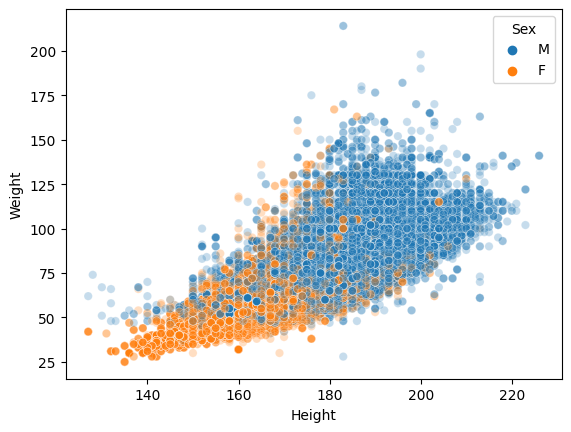

In [14]:
# Queremos ver si hay correlación entre el peso y la altura en los atletas
sns.scatterplot(data=data, x='Height', y='Weight', hue='Sex', alpha=0.25)

In [15]:
#Vemos si existe correlación entre las columnas (cuanto más se acerca a 1 más correlación)
data[['Age','Weight','Height']].corr()


,Age,Weight,Height
Age,1.000000,0.212069,0.138246
Weight,0.212069,1.000000,0.796213
Height,0.138246,0.796213,1.000000


<Axes: >

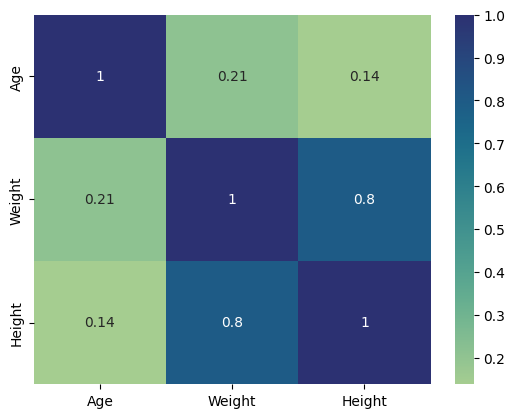

In [17]:
#Analizamos la correlación en un mapa de calor
sns.heatmap(data[['Age','Weight','Height']].corr(), annot=True, cmap='crest')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

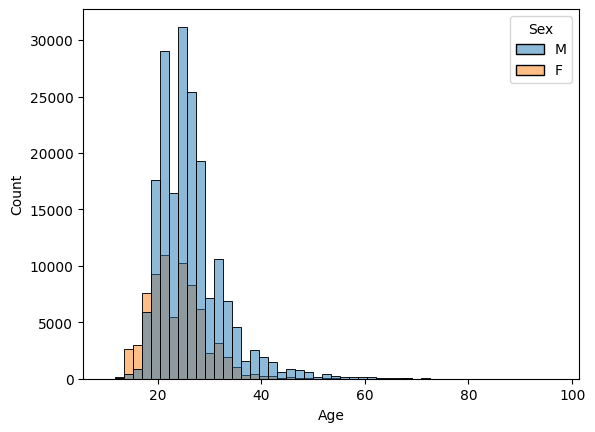

In [19]:
#Vemos cómo se distribuye la edad en hombres y mujeres
sns.histplot(data=data, x='Age', hue='Sex', bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


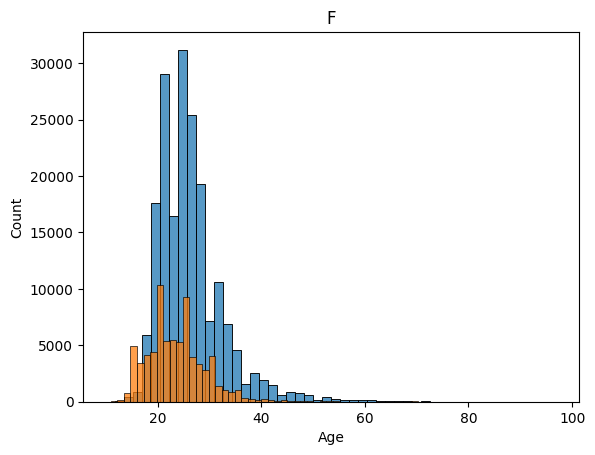

In [21]:
for value in data['Sex'].value_counts().index:
    sns.histplot(data=data[data['Sex']==value], x='Age', bins=50)
    plt.title(value)
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

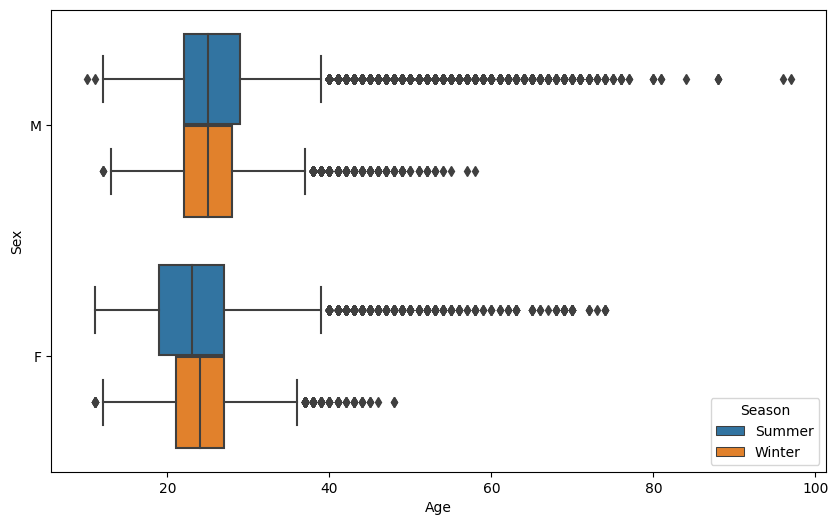

In [9]:
#Otra forma de ver la diferencia entre hombres y mujeres por temporada
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex', hue='Season')
plt.show

<Axes: xlabel='Age', ylabel='Sex'>

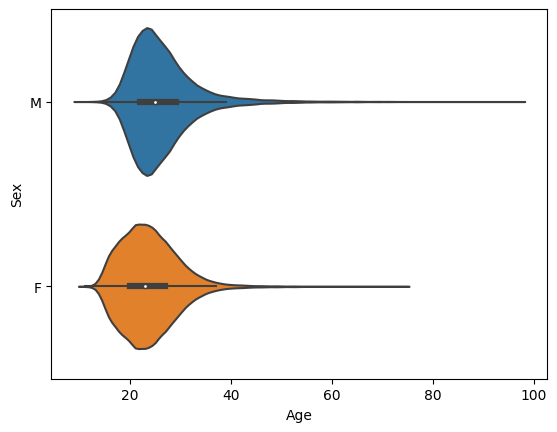

In [24]:
sns.violinplot(data=data, x='Age', y='Sex')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Year', ylabel='Age'>

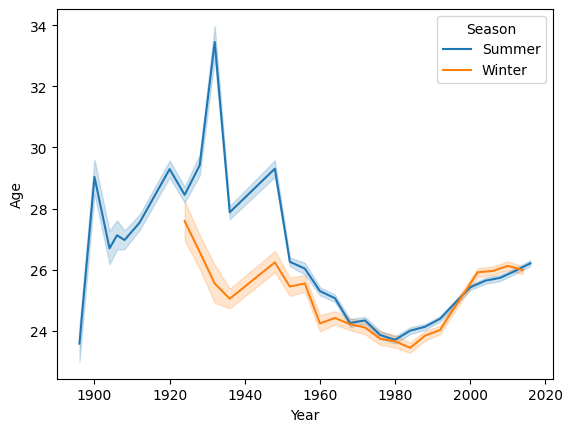

In [25]:
#Vemos cómo ha ido cambiando la edad de los atletas a lo largo del tiempo
sns.lineplot(data=data, x='Year', y='Age', hue='Season')